In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utility import desaturate_palette

## Data Loading

We load the data and check the first few rows to understand the structure of the data.

In [40]:
df0 = pd.read_csv("../data/HR_capstone_dataset.csv")
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [41]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Rename some of the columns for consistency and ease of use.

In [42]:
df0.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                        'number_project' : 'number_projects',
                        'Work_accident' : 'work_accident',
                        'promotion_last_5years' : 'promotion_last_5_years',
                        'time_spend_company' : 'time_spent_company',
                        'Department' : 'department'},
                        inplace = True)
df0.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

## EDA

Descriptive statistics

In [43]:
df0.describe()

satisfaction_level  last_evaluation  number_projects  \
count        14999.000000     14999.000000     14999.000000   
mean             0.612834         0.716102         3.803054   
std              0.248631         0.171169         1.232592   
min              0.090000         0.360000         2.000000   
25%              0.440000         0.560000         3.000000   
50%              0.640000         0.720000         4.000000   
75%              0.820000         0.870000         5.000000   
max              1.000000         1.000000         7.000000   

       average_monthly_hours  time_spent_company  work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

       promotion_last_5_years  
count            14999.000000  
mean                 0.021268  
std                  0.144281  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

In [44]:
num_dupes=df0.duplicated().sum()

print(f"Number of duplicate rows: {num_dupes}")

Number of duplicate rows: 3008


The data has some duplicate rows, which we remove, since exact matches in working hours, evaluation etc. seem implausible given the size of the dataset and the number of duplicates.

In [45]:
df_unique = df0.drop_duplicates()
df_unique.head()

satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                0.80             0.86                5   
2                0.11             0.88                7   
3                0.72             0.87                5   
4                0.37             0.52                2   

   average_monthly_hours  time_spent_company  work_accident  left  \
0                    157                   3              0     1   
1                    262                   6              0     1   
2                    272                   4              0     1   
3                    223                   5              0     1   
4                    159                   3              0     1   

   promotion_last_5_years department  salary  
0                       0      sales     low  
1                       0      sales  medium  
2                       0      sales  medium  
3                       0      sales     low  
4                       0      sales     low

### Outliers

The descriptive statistics above indicate that the data is fairly clean, with no strong outliers. The column with the strongest tail is the 'time_spent_company' column, which has a maximum value of 10 years. This is entirely plausible.

Text(0.5, 1.0, 'Boxplot of Time Spent at Company')

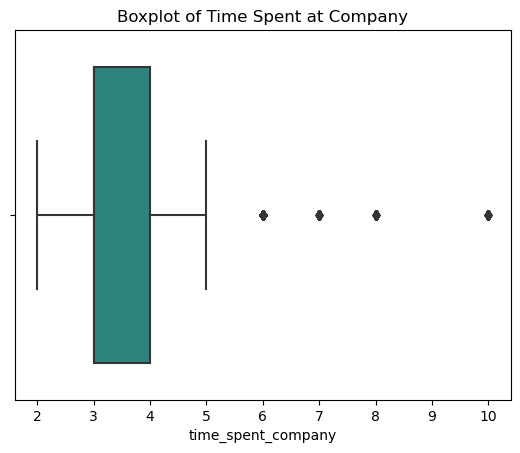

In [46]:
sns.boxplot(data=df_unique,x = 'time_spent_company', palette='viridis')
plt.title('Boxplot of Time Spent at Company')

### Visualizations & further EDA

Looking at the whole data, we find an overall turnover rate of 16.6%.

In [47]:
label_counts = df_unique['left'].value_counts()

print(f'Percentage of people who left: {label_counts[1]/label_counts.sum()*100:.2f}%')
print(f'Percentage of people who stayed: {label_counts[0]/label_counts.sum()*100:.2f}%')

Percentage of people who left: 16.60%
Percentage of people who stayed: 83.40%


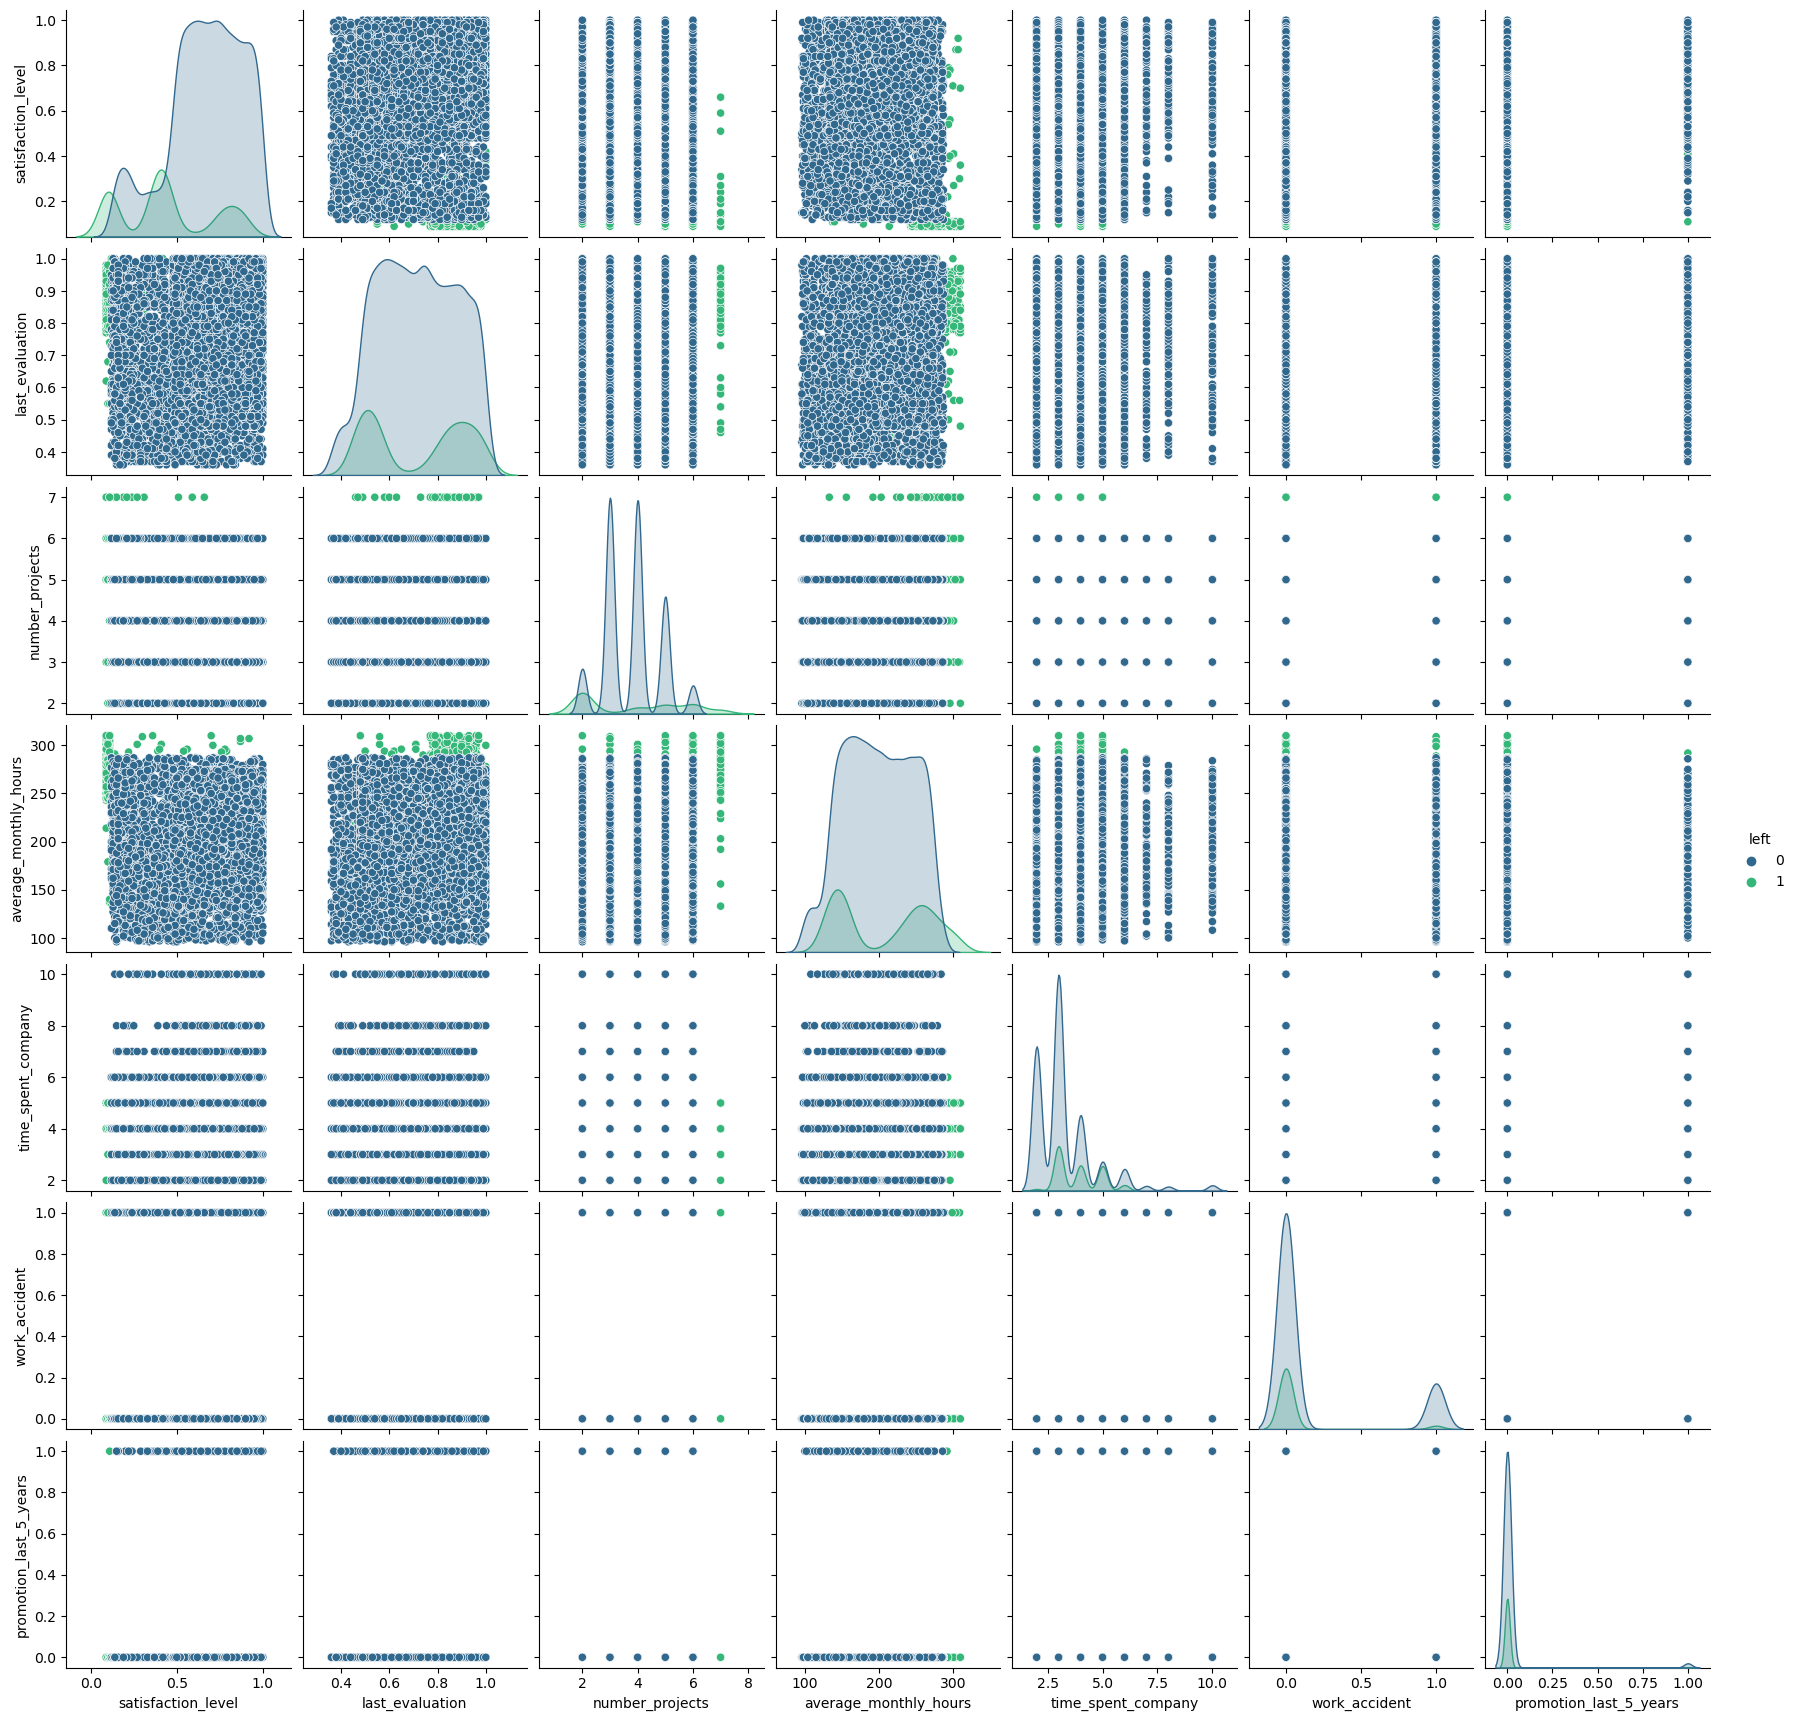

In [48]:
#Pairplot to visualize the distribution and correlation of features
warnings.filterwarnings('ignore')
sns.pairplot(df_unique, hue = 'left', palette = 'viridis');

<Axes: >

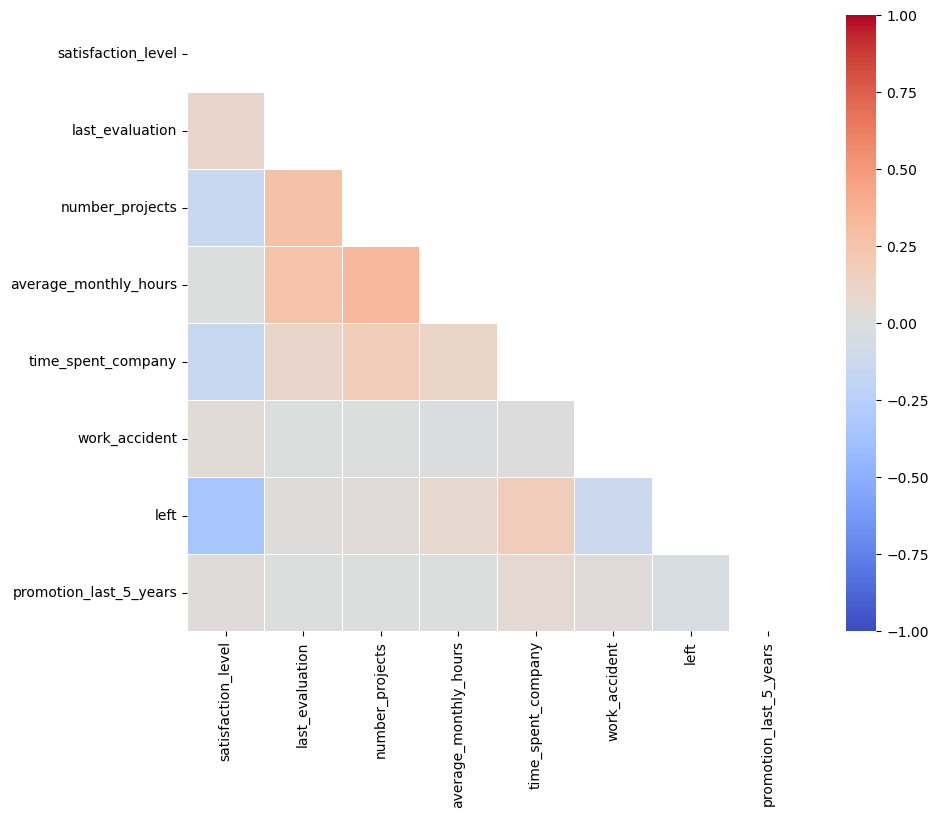

In [49]:
corr_matrix = df_unique.drop(['department', 'salary'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=0.5, mask=np.triu(corr_matrix))

From the correlation matrix, we can identify a negative correlation between satisfaction and leaving the company, which is expected. We also see positive correlation between leaving the company and tenure. We will now look into the final point some further.

<Axes: xlabel='time_spent_company', ylabel='last_evaluation'>

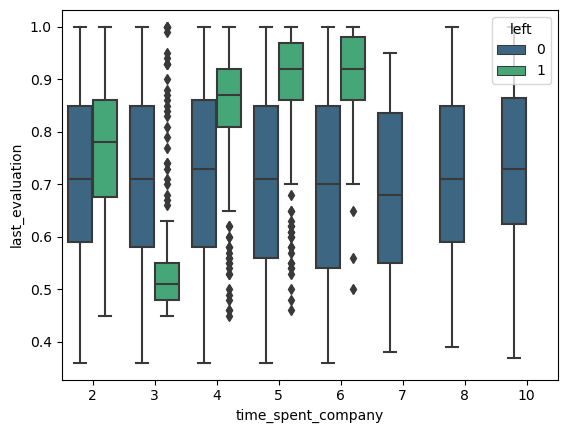

In [50]:
sns.boxplot(x = 'time_spent_company', y = 'last_evaluation', hue='left', data = df_unique, palette='viridis', saturation=0.75)

Employees who left after **4-6 years** are ones with very good evaluations!

In contrast, the **department** does not seem to have a string impact on turnover. This indicates that the high turnover is a company-wide issue, rather than being concentrated in a specific department.

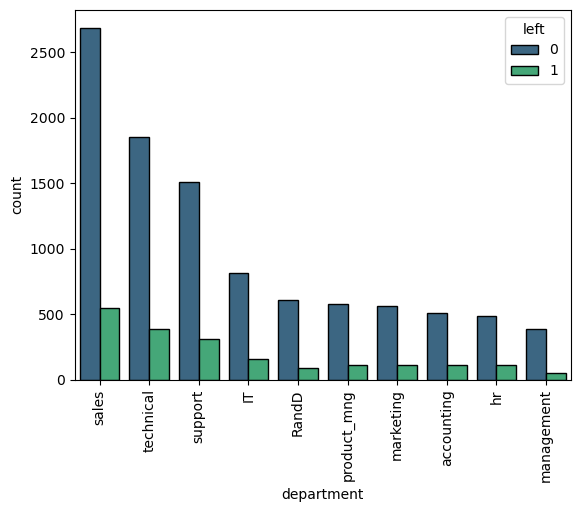

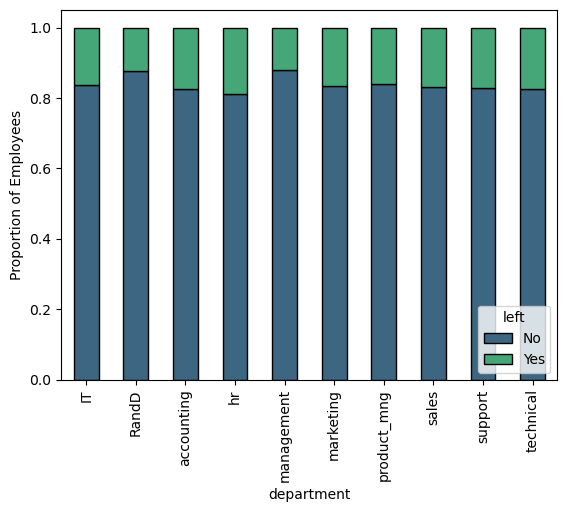

In [51]:
dep_group = df_unique.groupby(['department', 'left']).size().unstack()
dep_group = (dep_group.T / dep_group.sum(axis=1)).T

sns.countplot(x = 'department', hue = 'left', data = df_unique, order=df_unique['department'].value_counts().index, palette=sns.color_palette("viridis", 2), saturation=0.75, edgecolor='k');
plt.xticks(rotation = 90);

plt.show()

dep_group.plot(kind='bar', stacked=True, color=desaturate_palette(sns.color_palette("viridis", 2),0.75), edgecolor='k'); 
plt.legend(title='left', labels=['No', 'Yes'], loc='lower right'); 
plt.ylabel('Proportion of Employees');

**Salary** does seem to have an impact on turnover, with lower salaries being associated with higher turnover.

Text(0, 0.5, 'Proportion of employees who left')

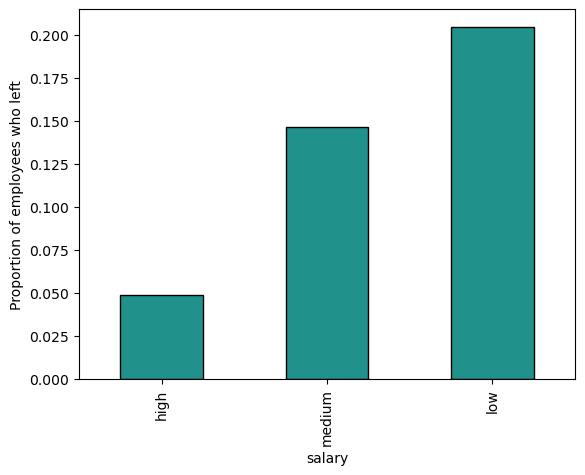

In [52]:
df_unique.groupby('salary')['left'].mean().sort_values().plot(kind = 'bar', edgecolor='k', color = sns.color_palette("viridis", 1))
plt.ylabel('Proportion of employees who left')

**Average monthly hours** paired with the **number of projects** appears to drive turnover. The group with 7 projects left the company entirely.

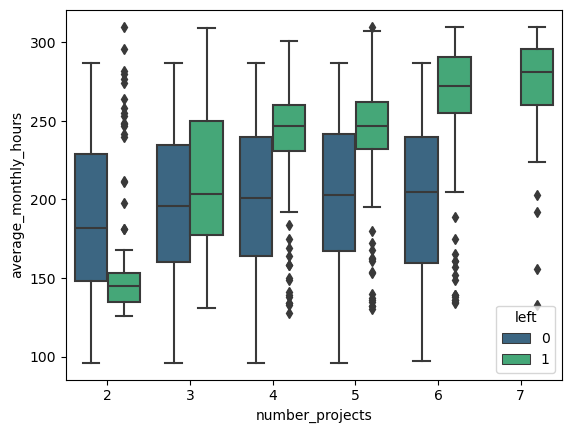

In [53]:
viridis = sns.color_palette("viridis", as_cmap=True)

sns.boxplot(x = 'number_projects', y='average_monthly_hours', hue = 'left', data = df_unique, palette=sns.color_palette("viridis", 2));


Interestingly, employees who had **work accidents** have a lower average turnover rate than those who did not.

left                  0         1
work_accident                    
0              0.814022  0.185978
1              0.943243  0.056757


Text(0, 0.5, 'Proportion of Employees')

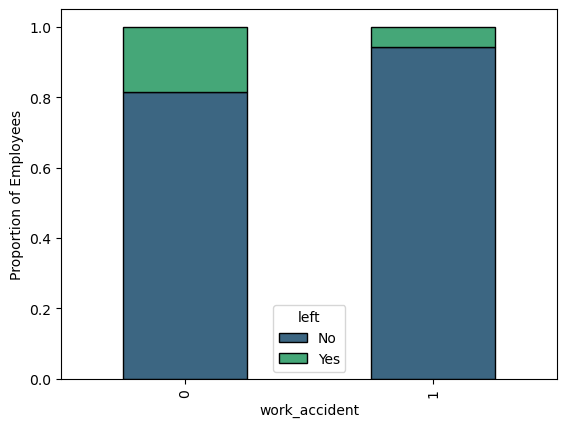

In [54]:
grouped = df_unique.groupby(['work_accident', 'left']).size().unstack().dropna()
grouped= (grouped.T / grouped.sum(axis=1)).T
print(grouped)

viridis = sns.color_palette("viridis", as_cmap=True)

grouped.plot(kind='bar', stacked=True, color=desaturate_palette(sns.color_palette("viridis", 2),0.75), edgecolor='k')  
plt.legend(title='left', labels=['No', 'Yes'], loc='lower center')
plt.ylabel('Proportion of Employees')


Let's look at some scatter plots in more detail to understand the relationships better.

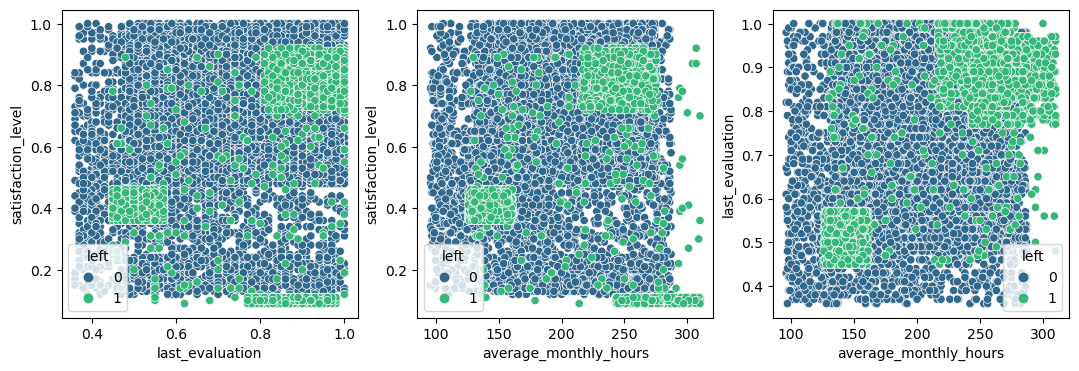

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))


sns.scatterplot(ax=ax[0],x='last_evaluation', y='satisfaction_level', data=df_unique.sort_values('left'), hue='left', hue_order=[0, 1], palette='viridis');
sns.scatterplot(ax=ax[1], x='average_monthly_hours',  y='satisfaction_level', hue='left', data=df_unique.sort_values('left'), palette='viridis');
sns.scatterplot(ax=ax[2], x='average_monthly_hours',  y='last_evaluation', hue='left', data=df_unique.sort_values('left'), palette='viridis');

From this we can make out three distinct groups of employees who left the company:

1. Those who are fairly dissatisfied and have low evaluations.

2. Those who are fairly satisfied and have high evaluations.

3. Those who have high evaluations but are extremely dissatisfied.

The average monthly hours show a similar pattern together with the satisfaction. For the employees who left, the average monthly ours seem to positively correlate with the last evaluation.
This plot also exemplifies the artificial nature of the data. In a real data set, we would not expect groupings with boundaries as clear as these.

We now want to focus on group 3 in particular and see how much of the turnover they make up. We isolate them by filtering by satisfaction and last evaluation.

In [56]:
promotion_rate = df_unique['promotion_last_5_years'].value_counts()[1] / df_unique['promotion_last_5_years'].value_counts().sum()

df_3 = df_unique.copy()
df_3 = df_3[(df_3['left'] == 1) & (df_3['satisfaction_level'] < 0.2) & (df_3['last_evaluation'] > 0.7)].reset_index(drop=True)

total_turnover = df_unique['left'].sum()
df_3_turnover = df_3['left'].sum()
print(f'Third group turnovers make up {df_3_turnover/total_turnover*100:.2f}% of the total turnover.')

d3_promotion_rate = df_3['promotion_last_5_years'].value_counts()[1] / df_3['promotion_last_5_years'].value_counts().sum()

print(f'Promotion rate for the third group: {d3_promotion_rate:.4f} vs. overall promotion rate: {promotion_rate:.3f}')

df_3.describe()


Third group turnovers make up 25.36% of the total turnover.
Promotion rate for the third group: 0.0020 vs. overall promotion rate: 0.017


satisfaction_level  last_evaluation  number_projects  \
count          505.000000       505.000000       505.000000   
mean             0.102297         0.872079         6.192079   
std              0.009934         0.061459         0.598225   
min              0.090000         0.730000         3.000000   
25%              0.100000         0.820000         6.000000   
50%              0.100000         0.870000         6.000000   
75%              0.110000         0.930000         7.000000   
max              0.190000         1.000000         7.000000   

       average_monthly_hours  time_spent_company  work_accident   left  \
count             505.000000          505.000000     505.000000  505.0   
mean              275.431683            4.095050       0.049505    1.0   
std                23.131092            0.360328       0.217135    0.0   
min               136.000000            2.000000       0.000000    1.0   
25%               259.000000            4.000000       0.000000    1.0   
50%               277.000000            4.000000       0.000000    1.0   
75%               293.000000            4.000000       0.000000    1.0   
max               310.000000            5.000000       1.000000    1.0   

       promotion_last_5_years  
count              505.000000  
mean                 0.001980  
std                  0.044499  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

The statistics indicate that there are 505 employees with very high working hours, 4-6 years of experience and many projects. Notably, almost no promotions were given to this group, which may have contributed to their dissatisfaction.

We proceed with a similar analysis for group 1.

In [57]:
df_1 = df_unique.copy()
df_1 = df_1[(df_1['left'] == 1) & (df_1['satisfaction_level'] > 0.65) & (df_1['last_evaluation'] > 0.7)].reset_index(drop=True)

total_turnover = df_unique['left'].sum()
df_1_turnover = df_1['left'].sum()

d1_promotion_rate = df_1['promotion_last_5_years'].value_counts()[1] / df_1['promotion_last_5_years'].value_counts().sum()

print(f'First group turnovers make up {df_1_turnover/total_turnover*100:.2f}% of the total turnover.')
print(f'Promotion rate for the first group: {d1_promotion_rate:.4f} vs. overall promotion rate: {promotion_rate:.3f}')
df_1.describe()

First group turnovers make up 26.02% of the total turnover.
Promotion rate for the first group: 0.0019 vs. overall promotion rate: 0.017


satisfaction_level  last_evaluation  number_projects  \
count          518.000000       518.000000       518.000000   
mean             0.816641         0.920367         4.554054   
std              0.060257         0.062718         0.618832   
min              0.660000         0.710000         2.000000   
25%              0.770000         0.870000         4.000000   
50%              0.820000         0.920000         5.000000   
75%              0.870000         0.980000         5.000000   
max              0.920000         1.000000         6.000000   

       average_monthly_hours  time_spent_company  work_accident   left  \
count             518.000000          518.000000     518.000000  518.0   
mean              244.805019            5.104247       0.054054    1.0   
std                23.704308            0.613155       0.226343    0.0   
min               130.000000            2.000000       0.000000    1.0   
25%               232.000000            5.000000       0.000000    1.0   
50%               246.000000            5.000000       0.000000    1.0   
75%               260.750000            5.000000       0.000000    1.0   
max               310.000000            6.000000       1.000000    1.0   

       promotion_last_5_years  
count              518.000000  
mean                 0.001931  
std                  0.043937  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

### Insights

We have identified distinct groups of employees bases on the satisfaction, last evaluation, amount of projects and hours.

Two of these groups are employees with very high evaluations, but partially low satisfaction, making up more than 50% of the total turnover.
For these two groups, high working ours and a below average 5 year promotion rates were identified as a potential cause for dissatisfaction and leaving.